# Face Face Recognition Sytem

In [3]:
!pip install opencv-python


In [5]:
!pip install opencv-contrib-python


  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.5 MB ? eta -:--:--
    --------------------------------------- 0.8/45.5 MB 2.4 MB/s eta 0:00:19
    --------------------------------------- 1.0/45.5 MB 2.8 MB/s eta 0:00:16
   - -------------------------------------- 1.6/45.5 MB 2.1 MB/s eta 0:00:21
   - -------------------------------------- 1.8/45.5 MB 1.9 MB/s eta 0:00:24
   - -------------------------------------- 2.1/45.5 MB 1.7 MB/s eta 0:00:26
   - -------------------------------------- 2.1/45.5 MB 1.7 MB/s eta 0:00:26
   -- ------------------------------------- 2.4/45.5 MB 1.5 MB/s eta 0:00:29
   -- ------------------------------------- 2.4/45.5 MB 1.5 MB/s eta 0:00:29
   -- ------------------------------------- 2.6/45.5 MB 1.3 MB/s eta 0:00:34
   -- ------------------------------------- 2.6/45.5 MB 1.3 MB/s eta 0:00:34
  

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

E:\FaceAttendance\attendance_system\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
#faceapp.get()

#### Extract Facial Features and labels

In [4]:
import re # regular expression

In [5]:
def clean_name(string):
    # Allow only A-Z a-z
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [6]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =',role,end='\t')
    #print('Name =', name)
    
    # path of each image in respective folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)      
        
        # step-2: get the info
        result = faceapp.get(img_arr,max_num=1) # return list
        
        if len(result) > 0:
            # step-3: extract facial embedding
            res = result[0]
            embedding = res['embedding']
            # step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])

In [7]:
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
dataframe # store in redis

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401..."
2,Angelina Jolie,Student,"[0.86389494, 0.32952014, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.661117, 1.1610861, -0.41079235, -2.6411536,..."
4,Angelina Jolie,Student,"[0.86431384, 0.9437617, 0.4265172, -1.1836909,..."
5,Angelina Jolie,Student,"[0.41049737, 1.1810867, -0.99572563, -1.401910..."
6,Angelina Jolie,Student,"[0.42300692, 2.0838692, 1.0644906, -2.273823, ..."
7,Angelina Jolie,Student,"[0.3944185, 0.8441229, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931158, 1.1680498, -0.2896319, -2.0099528,..."
9,Angelina Jolie,Student,"[-0.6354263, 1.7897136, 0.59832734, -3.5500891..."


## Inference

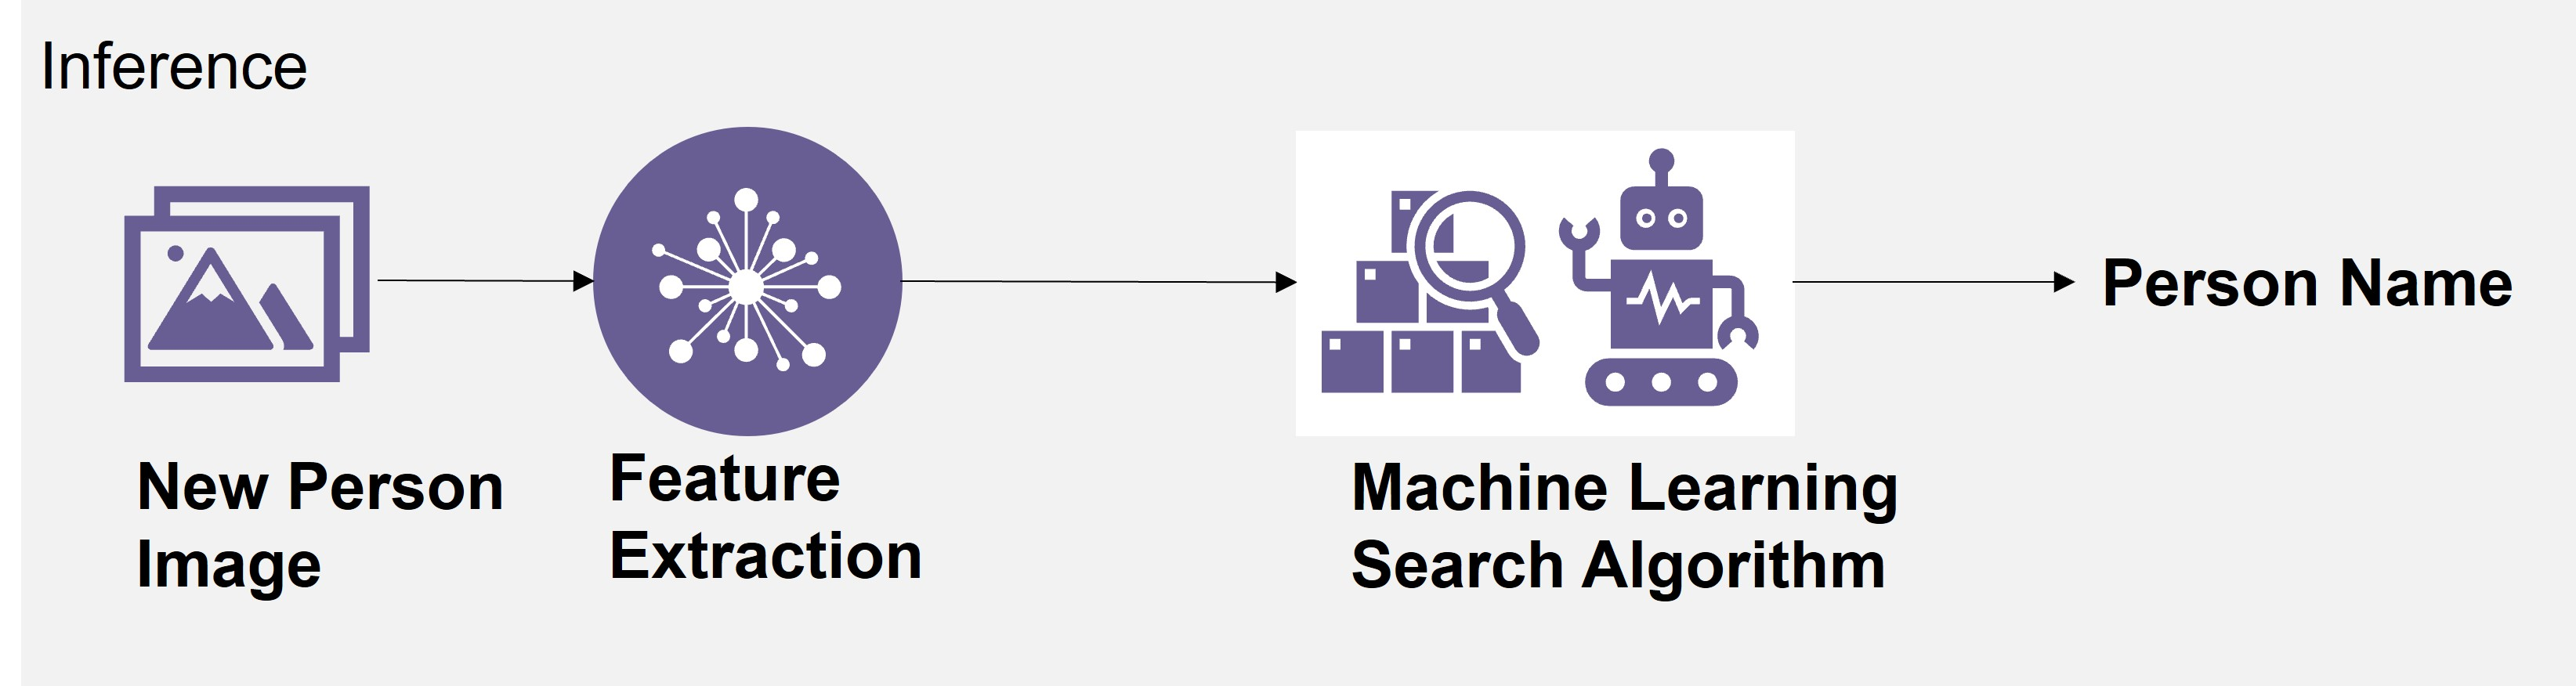

#### step-1: read image

In [8]:
# read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### step -2: Extract Feature

In [9]:
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

current loop = 0


In [10]:
# consider only one sample
len(embed_test)

512

In [11]:
embed_test

array([-1.0794208 , -1.1068169 , -1.2358055 , -1.1184733 ,  1.6912835 ,
        1.2587602 , -0.42545304,  1.2529421 ,  1.9019961 ,  1.1875618 ,
       -2.2458298 ,  2.0359764 , -0.16769719,  0.5307629 ,  0.30050385,
       -0.21242332,  0.30540988, -1.0245438 ,  0.23911111,  1.2249293 ,
       -0.31456357, -1.1223117 ,  2.434485  ,  1.028548  ,  0.6132133 ,
       -1.2184055 ,  1.4724448 , -0.37911248, -1.1318517 ,  1.2429032 ,
        1.1630024 ,  0.4936406 ,  0.96875656,  0.03858541,  0.40804625,
       -0.41315192,  0.0175181 ,  0.35681504,  0.91274536, -0.13435462,
       -1.5694399 ,  1.4076433 ,  0.95215726, -0.38525414,  0.08780497,
       -0.47189492, -0.20714581,  1.118402  ,  0.775218  , -0.74888206,
       -2.0983334 ,  0.99330544, -1.8608006 , -2.0646064 , -0.8853907 ,
       -0.03325728,  2.255765  ,  0.24467283, -0.39156628, -1.2572623 ,
       -0.8227543 ,  0.22220078,  0.57083416,  0.37354052, -1.1787844 ,
        0.86121935,  0.08324359,  0.71663344,  1.3165777 ,  0.48

#### Algorithm

In [12]:
X_list =  dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [13]:
X.shape

(50, 512)

In [14]:
from sklearn.metrics import pairwise

In [15]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [16]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [17]:
data_search.head(2)

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825...",30.831608,550.446652,-0.011336
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401...",30.680958,555.258289,0.018317


In [18]:
import matplotlib.pyplot as plt

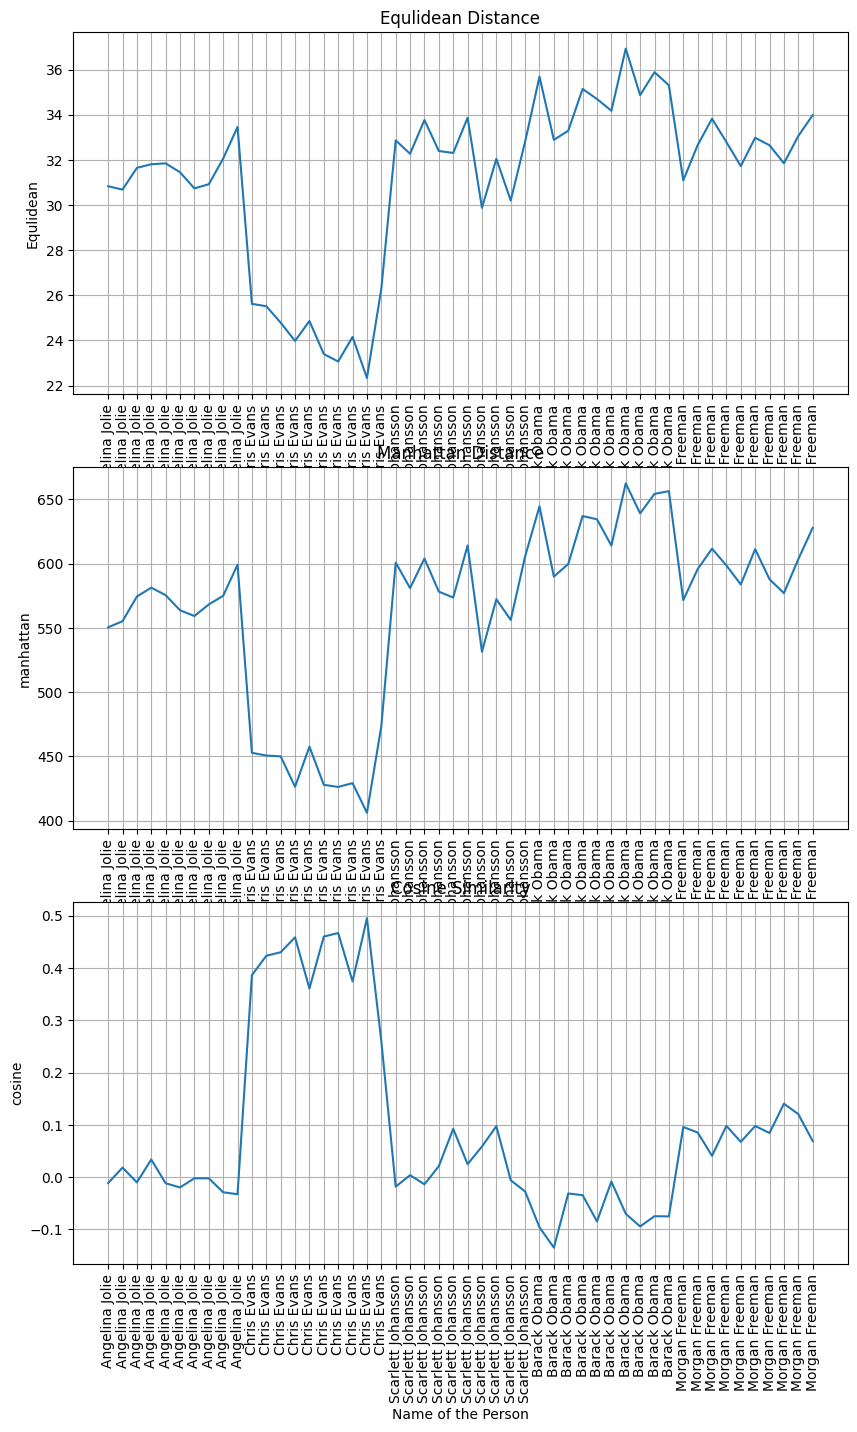

In [19]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [20]:
d_eq_optimal = 25

In [21]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name , role = datafilter.loc[argmin][['Name','Role']]
    
else:
    name = 'Unknown'
    role = 'Unknown'

In [22]:
print(name, role)

Chris Evans Student


### Identify the Person using Manhattan Distance

In [23]:
d_man_optimal = 450

In [24]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][['Name','Role']]
    
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [25]:
print(name, role)

Chris Evans Student


### Identify the Person using Cosine Similarity

In [26]:
S_opt = 0.4

In [27]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos , role_cos = datafilter.loc[argmax][['Name','Role']]
    
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [28]:
print(name_cos, role_cos)

Chris Evans Student


In [29]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Chris Evans,Student,"[1.7491673, -2.1218207, -0.15238187, -0.905725...",25.515486,450.687724,0.423367
1,Chris Evans,Student,"[0.44954255, -1.6314546, -0.95116156, -1.54259...",24.786526,450.057994,0.430162
2,Chris Evans,Student,"[0.85855025, -1.0998964, -0.7710619, -1.491809...",23.976940,426.412996,0.458632
3,Chris Evans,Student,"[0.3535511, -0.6977062, -0.30065766, -1.911663...",23.396654,427.903388,0.460120
4,Chris Evans,Student,"[1.3115128, -2.0906687, -1.0403854, -1.7981217...",23.065950,426.244138,0.466912
5,Chris Evans,Student,"[0.59088683, -1.4150559, -0.6726382, -1.310897...",22.336002,406.118973,0.495197


### Identify Multiple Person in an Image

In [30]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name_role=['Name','Role'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
    
    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
        
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
        
    return person_name, person_role

In [31]:
test_image = cv2.imread('test_images/test_10.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
        
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)
    
    
cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compressing my dataset

In [34]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43240861892700194, 1.0746600151062011, -0.1..."
1,Barack Obama,Teacher,"[0.9487079620361328, -0.558357048034668, 0.094..."
2,Chris Evans,Student,"[0.7200980663299561, -1.468521785736084, -0.77..."
3,Morgan Freeman,Teacher,"[0.48542585372924807, -0.6193629741668701, -0...."
4,Scarlett Johansson,Student,"[0.1913154363632202, -0.48847031593322754, -1...."


#### convert dataframe into array and save in numpy zip format

In [35]:
xvalues = dataframe_compress.values

In [36]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [37]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [38]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [39]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43240861892700194, 1.0746600151062011, -0.1..."
1,Barack Obama,Teacher,"[0.9487079620361328, -0.558357048034668, 0.094..."
2,Chris Evans,Student,"[0.7200980663299561, -1.468521785736084, -0.77..."
3,Morgan Freeman,Teacher,"[0.48542585372924807, -0.6193629741668701, -0...."
4,Scarlett Johansson,Student,"[0.1913154363632202, -0.48847031593322754, -1...."


### [END](https://www.udemy.com/user/freeai-space/)
---